In [67]:
import numpy as np
import matplotlib.pyplot as plt

#### Create a sample Signal

In [68]:
f_1 = 50 
f_2 = 120 
t = np.linspace(0, 1, 1000)
f = np.sin(2 * np.pi * f_1 * t ) + np.sin(2 * np.pi * f_2 * t )
clean_f = f

#### Adding Noise to the signal

In [69]:
f = f + 2.5 * np.random.randn(len(t))

#### Plotting signals

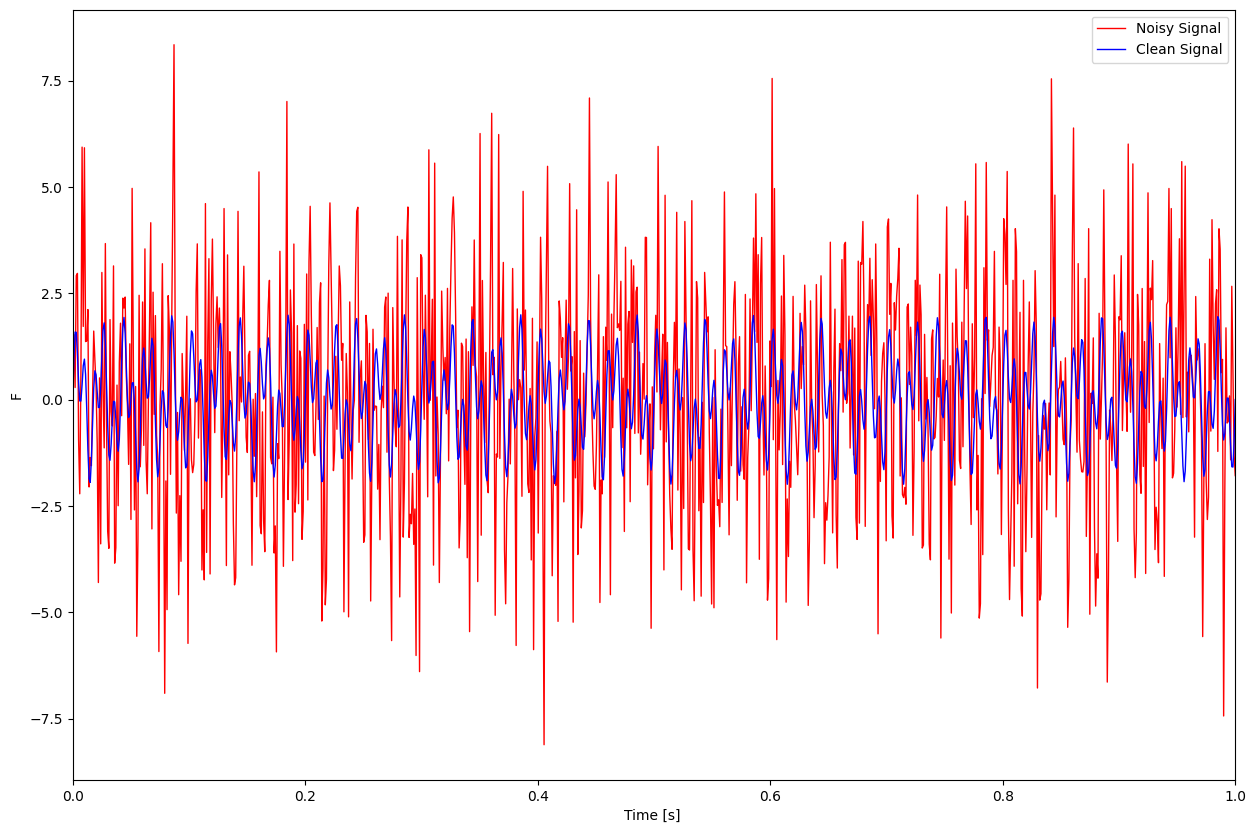

In [70]:

plt.figure(figsize=(15, 10))
plt.plot(t,f,color="r",linewidth = 1, label ="Noisy Signal")
plt.plot(t,clean_f, color="b",linewidth = 1, label="Clean Signal")
plt.xlabel("Time [s] ")
plt.ylabel("F")
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

#### Compute The Fast Fourier Transform FFT

In [71]:
n = len(t)
dt = 0.001
f_hat = np.fft.fft(f,n)
psd =1/n * (f_hat * np.conj(f_hat))
freq = (1/(dt * n)) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype="int")

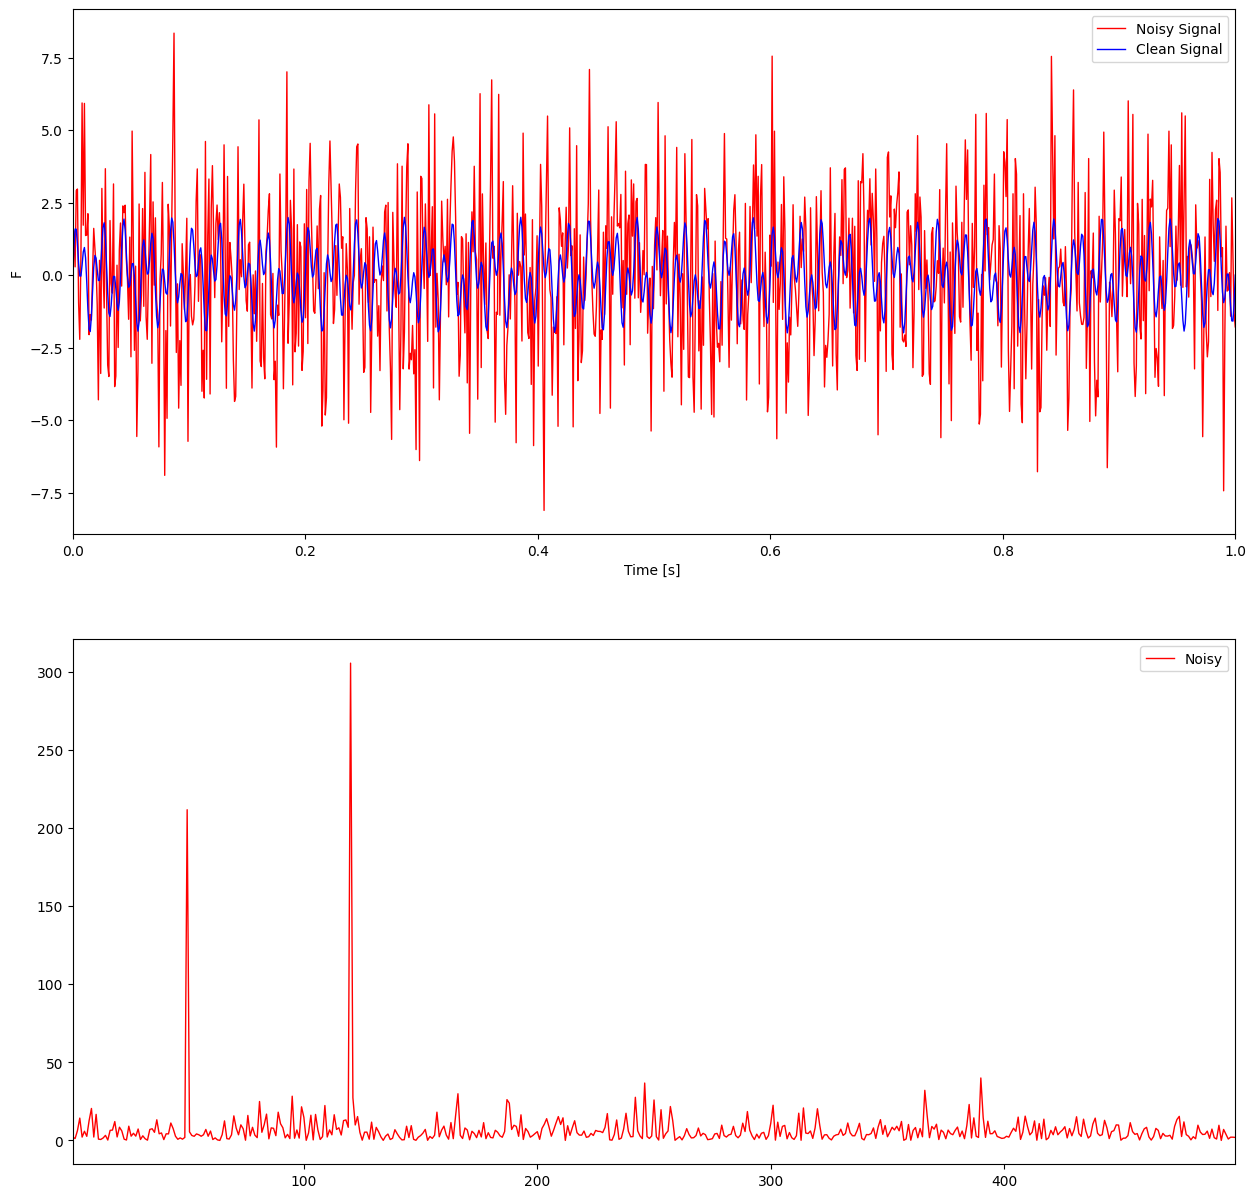

In [72]:
fig,axs = plt.subplots(2,1, figsize=(15, 15))

plt.sca(axs[0])
plt.plot(t,f,color="r",linewidth = 1, label ="Noisy Signal")
plt.plot(t,clean_f, color="b",linewidth = 1, label="Clean Signal")
plt.xlim(t[0],t[-1])
plt.xlabel("Time [s] ")
plt.ylabel("F")
plt.legend()


plt.sca(axs[1])
plt.plot(freq[L],psd[L],color="r",linewidth = 1, label ="Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

#### Use PSD to filter out Noise

In [73]:
indices = psd > 100
clean_psd = psd * indices
f_hat = indices * f_hat
fft_inverse = np.fft.ifft(f_hat)

#### Plots

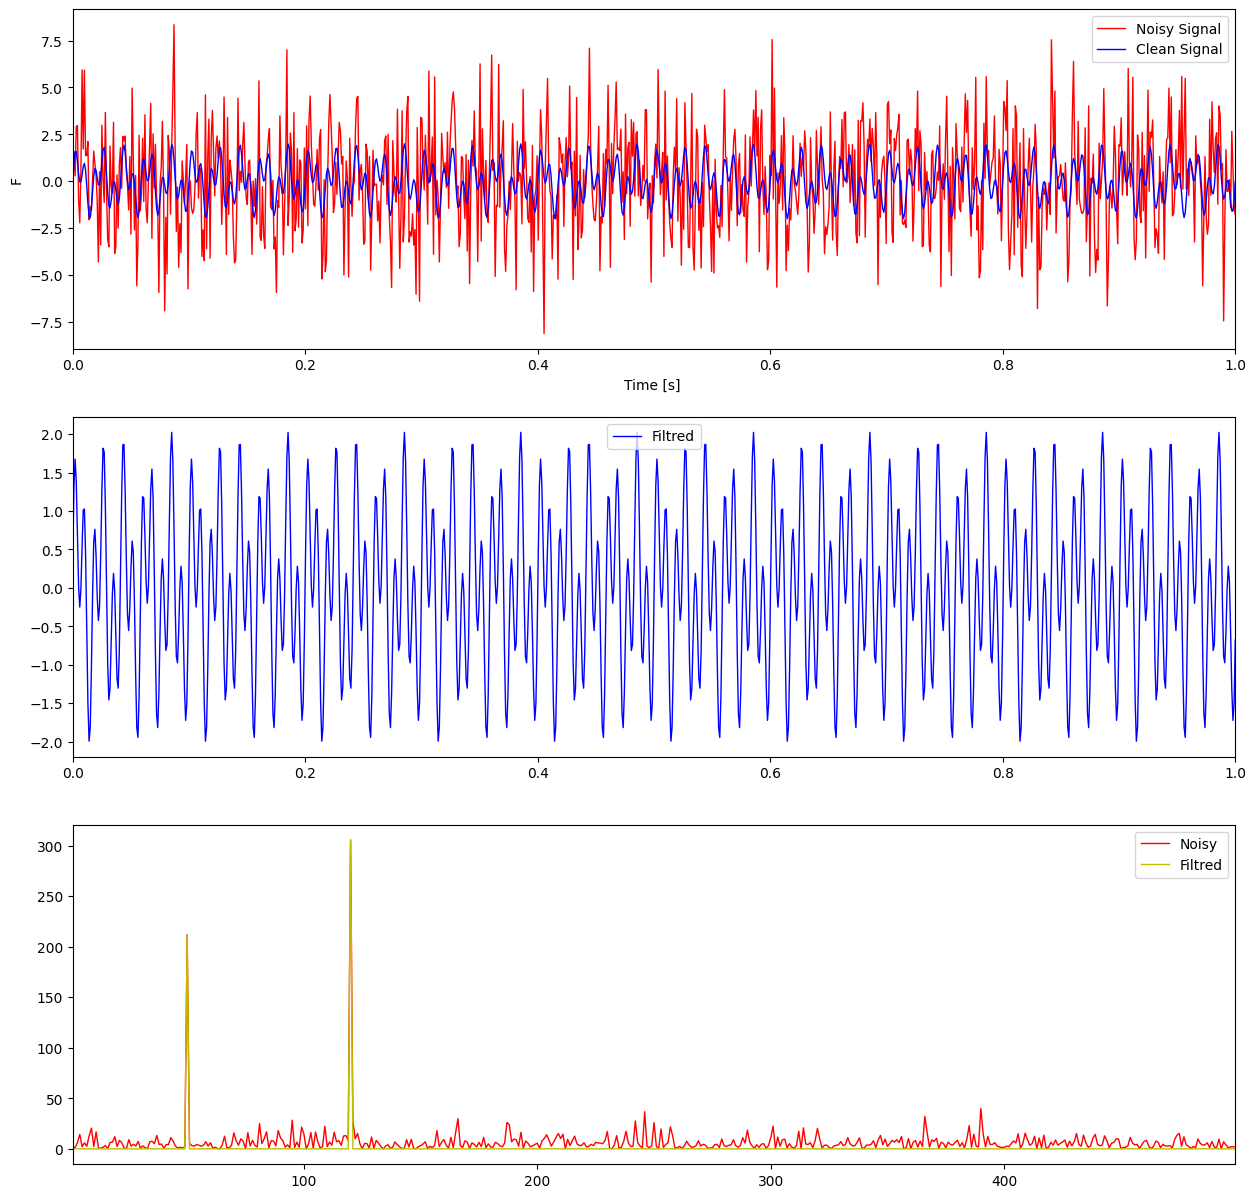

In [74]:
fig,axs = plt.subplots(3,1, figsize=(15, 15))

plt.sca(axs[0])
plt.plot(t,f,color="r",linewidth = 1, label ="Noisy Signal")
plt.plot(t,clean_f, color="b",linewidth = 1, label="Clean Signal")
plt.xlabel("Time [s] ")
plt.ylabel("F")
plt.xlim(t[0],t[-1])
plt.legend()


plt.sca(axs[1])
plt.plot(t,fft_inverse,color="b",linewidth = 1, label ="Filtred")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],psd[L],color="r",linewidth = 1, label ="Noisy")
plt.plot(freq[L],clean_psd[L],color="y",linewidth = 1, label ="Filtred")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()